In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [134]:
df = pd.read_csv("../resources/Res_20kmParis09_Def_Web.csv", sep=";")
df["Tps Couru"] = pd.to_timedelta(df["Tps Couru"]) / np.timedelta64(1, 'm')
df["sex"] = df.Categorie.map(lambda x: "F" if "F" in x else "H")
df.head()

,Dossard,Nom,Prenom,Categorie,Nb Arrivants,Arrivants Cat,Tps Officiel,Tps Couru,Place Couru,Place Cat,...,Tps 10Km,Place 10km,Tps 15Km,Place 15km,Heure Depart,Heure Arrivee,Heure 5km,Heure 10km,Heure 15km,sex
0,13,TESFAY,MICHAEL,SH,22016,9405,00:59:34,59.550000,1,1,...,00:30:31,4,00:44:56,1,35953050,10:58:46,10:14:06,10:29:44,10:44:09,H
1,19,DISI,DIEUDONNE,SH,22016,9405,00:59:33,59.550000,2,2,...,00:30:34,16,00:44:58,9,35952200,10:58:45,10:14:06,10:29:46,10:44:10,H
2,10,KANDA,LUKA,SH,22016,9405,00:59:34,59.550000,3,3,...,00:30:32,11,00:44:57,6,35952850,10:58:46,10:14:06,10:29:45,10:44:10,H
3,5,KIFLEMARIAN,SAMSON,SH,22016,9405,00:59:36,59.600000,4,4,...,00:30:32,15,00:44:57,7,35952000,10:58:48,10:14:06,10:29:44,10:44:09,H
4,9,KORIR,PATRICK,SH,22016,9405,00:59:38,59.616667,5,5,...,00:30:32,8,00:44:56,4,35952800,10:58:50,10:14:06,10:29:44,10:44:09,H


<AxesSubplot:xlabel='time (hrs.)', ylabel='Density'>

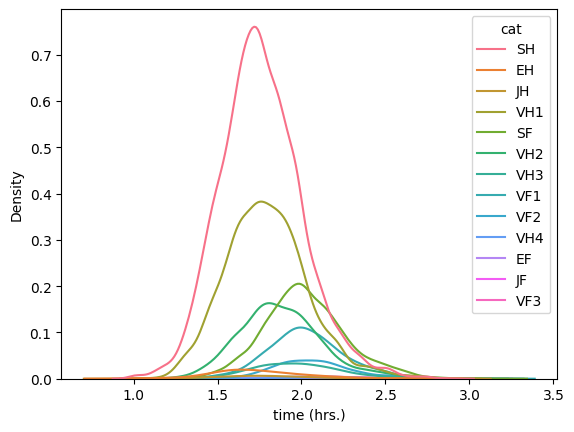

In [46]:
sns.kdeplot(data=df, x="time (hrs.)", hue="cat")

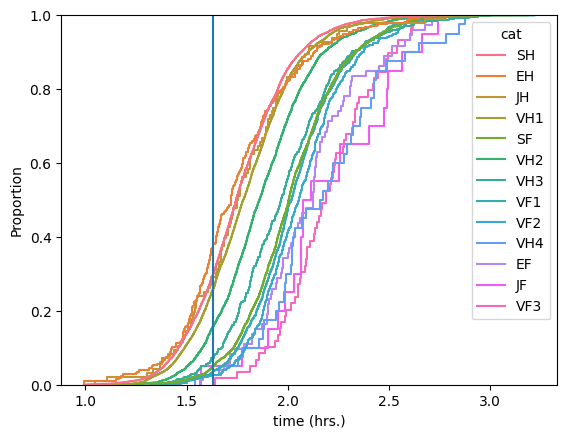

In [52]:
sns.ecdfplot(data=df, x="time (hrs.)", stat="proportion", hue="cat")
plt.gca().axvline(x=df[df["name"]=="DOUMAZANE"]["time (hrs.)"].values[0])

<AxesSubplot:xlabel='time', ylabel='Count'>

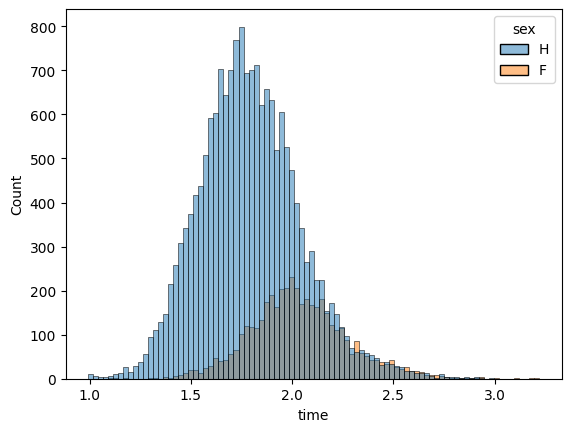

In [18]:
sns.histplot(data=df, x="time", hue="sex")

In [94]:
df = pd.read_clipboard()

In [95]:
df

,Place,Nom,Temps scratch,Cat.,N°
0,1,TALAOVANOU KARIM,01:31:42,1-SENIORS HOMME,3449
1,2,DUBOULOZ CHARLES,01:32:16,1-ESPOIRS HOMME,2424
2,3,VINOT GREGORY,01:33:05,2-SENIORS HOMME,3416
3,4,ANTOLINOS FABIEN,01:33:49,3-SENIORS HOMME,3187
4,5,BATTAIL THOMAS,01:34:35,4-SENIORS HOMME,3054
...,...,...,...,...,...
1362,1363,GENTY BERNARD,03:34:11,31-VETERAN 3 HOMME,2476
1363,1364,DELANDRE FRÉDÉRIC,03:34:35,330-VETERAN 1 HOMME,2695
1364,1365,GINIER-GILLET SYLVANE,03:45:00,71-VETERAN 1 FEMME,2778
1365,1366,SABOURIN DOMINIQUE,03:49:41,160-VETERAN 2 HOMME,2090


<AxesSubplot:xlabel='Temps scratch', ylabel='Cat.'>

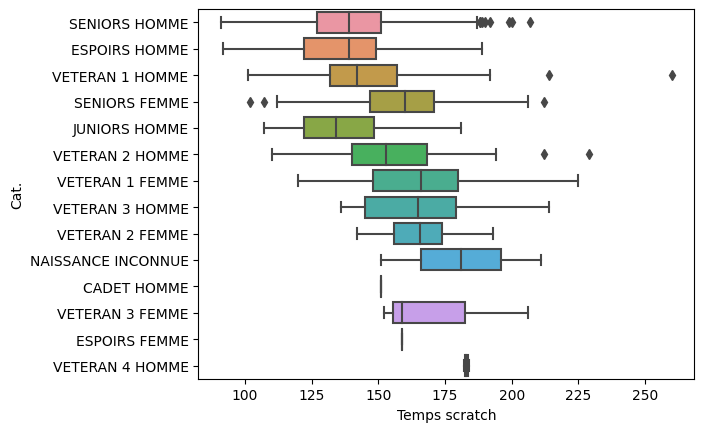

In [96]:
#df.to_csv("20100328_Lyon_Urban_Trail_22KM.csv", index=False)
df = pd.read_csv("20100328_Lyon_Urban_Trail_22KM.csv")
df["Temps scratch"] = pd.to_timedelta(df["Temps scratch"]).astype('timedelta64[m]')
df["Cat."] = df["Cat."].str.split('-').str[-1]
sns.boxplot(data=df, x="Temps scratch", y="Cat.")

In [99]:
df["Cat."].value_counts()

SENIORS HOMME         586
VETERAN 1 HOMME       331
VETERAN 2 HOMME       160
SENIORS FEMME          87
VETERAN 1 FEMME        71
ESPOIRS HOMME          41
VETERAN 2 FEMME        36
VETERAN 3 HOMME        31
JUNIORS HOMME          15
VETERAN 3 FEMME         3
NAISSANCE INCONNUE      2
VETERAN 4 HOMME         2
CADET HOMME             1
ESPOIRS FEMME           1
Name: Cat., dtype: int64

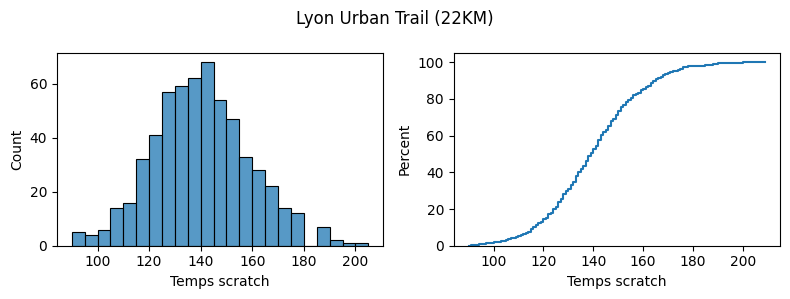

In [131]:
data = df.loc[df["Cat."] == "SENIORS HOMME", "Temps scratch"] 

_, axs = plt.subplots(1, 2, figsize=(8,3))
axi = axs.flat
plt.sca(next(axi))
sns.histplot(data, bins=np.arange(90, 210, 5), )
plt.sca(next(axi))
sns.histplot(data, bins=np.arange(90, 210, 1), cumulative=True, stat="percent", fill=False, element="step")
plt.suptitle("Lyon Urban Trail (22KM)")
plt.tight_layout()

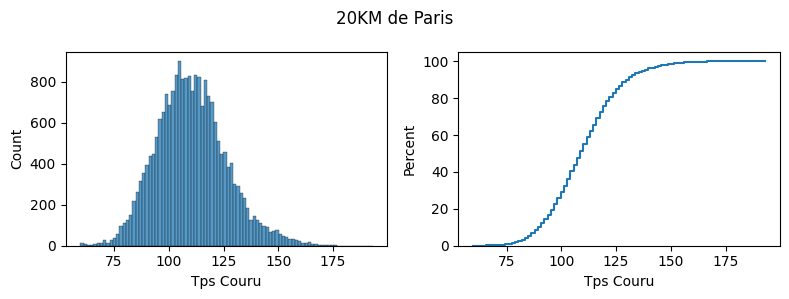

In [138]:
df = pd.read_csv("../resources/Res_20kmParis09_Def_Web.csv", sep=";")
data = pd.to_timedelta(df["Tps Couru"]) / np.timedelta64(1, 'm')

_, axs = plt.subplots(1, 2, figsize=(8,3))
axi = axs.flat
plt.sca(next(axi))
sns.histplot(data)
plt.sca(next(axi))
sns.histplot(data, cumulative=True, stat="percent", fill=False, element="step")
plt.suptitle("20KM de Paris")
plt.tight_layout()